#run pip install datasets in console first!

<h1> Load AG News dataset </h1>



In [9]:
import pandas as pd
from datasets import load_dataset

# Load AG News dataset
dataset = load_dataset("ag_news")
df_train = pd.DataFrame(dataset["train"])
df_test = pd.DataFrame(dataset["test"])

Using custom data configuration default
Reusing dataset ag_news (/home/jovyan/.cache/huggingface/datasets/ag_news/default/0.0.0/bc2bcb40336ace1a0374767fc29bb0296cdaf8a6da7298436239c54d79180548)


  0%|          | 0/2 [00:00<?, ?it/s]

In [11]:
# Show sample data
print(df_train.head())

                                                text  label  text_length
0  Wall St. Bears Claw Back Into the Black (Reute...      2          144
1  Carlyle Looks Toward Commercial Aerospace (Reu...      2          266
2  Oil and Economy Cloud Stocks' Outlook (Reuters...      2          232
3  Iraq Halts Oil Exports from Main Southern Pipe...      2          256
4  Oil prices soar to all-time record, posing new...      2          234


In [12]:
# Basic text statistics
df_train["text_length"] = df_train["text"].apply(len)
print(df_train["text_length"].describe())

count    120000.000000
mean        236.477525
std          66.509741
min         100.000000
25%         196.000000
50%         232.000000
75%         266.000000
max        1012.000000
Name: text_length, dtype: float64


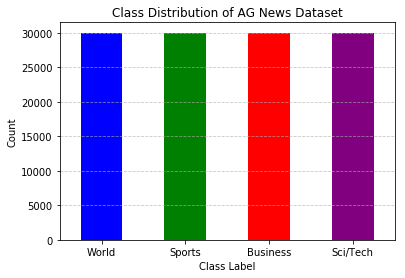

In [8]:
import matplotlib.pyplot as plt

# Get class distribution
class_counts = df_train["label"].value_counts()

# Create bar plot
ax = class_counts.plot(kind="bar", color=["blue", "green", "red", "purple"])

# Fix xtick labels manually
ax.set_xticks(range(len(class_counts)))  # Set positions
ax.set_xticklabels(["World", "Sports", "Business", "Sci/Tech"], rotation=0)  # Set labels

# Customize labels
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.title("Class Distribution of AG News Dataset")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()


<h1>Train Model </h1>

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [21]:
# Prepare dataset
X_train, X_test, y_train, y_test = train_test_split(df_train["text"], df_train["label"], test_size=0.2, random_state=42)
print("dataset prepared")

dataset prepared


In [22]:
# Train TF-IDF + Logistic Regression
pipeline = make_pipeline(TfidfVectorizer(max_features=10000), LogisticRegression(max_iter=1000))
pipeline.fit(X_train, y_train)
print("training completed")

training completed


In [19]:
# Evaluate performance
print("Accuracy:", pipeline.score(X_test, y_test))      

Accuracy: 0.91325


<h1> Test at inference</h1>
You can change sentence to test it!

In [25]:
# Define a new test sentence
new_text = ["The stock market is experiencing a significant downturn due to global events."]

In [27]:
# Define label mapping
label_map = {0: "World News", 1: "Sports", 2: "Business", 3: "Science & Tech"}

# Print human-readable prediction
print(f"Predicted Category: {label_map[predicted_label]}")

Predicted Category: Business
